# Welcome to the Plant Height Tutorial

Made by Eliza Seigel\
Updated April 21, 2025\
Code adapted from Keely Brown and Haley Schuhl

In [1]:
# Set the notebook display method.
%matplotlib widget

#Import libraries
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans
import plantcv.geospatial as geo
import os
import cv2
import napari

pcv.params.debug = "plot"

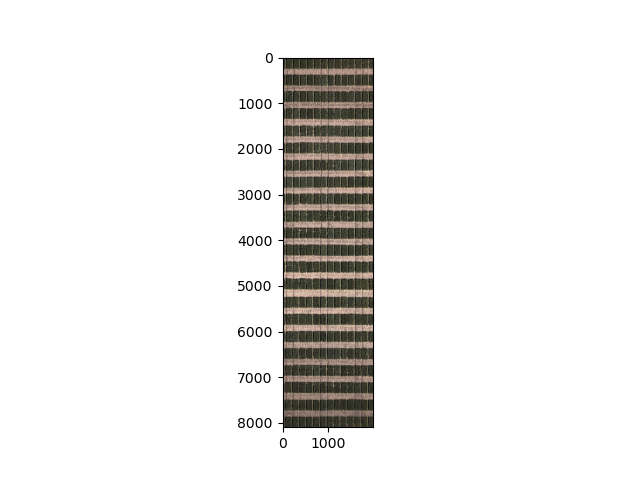

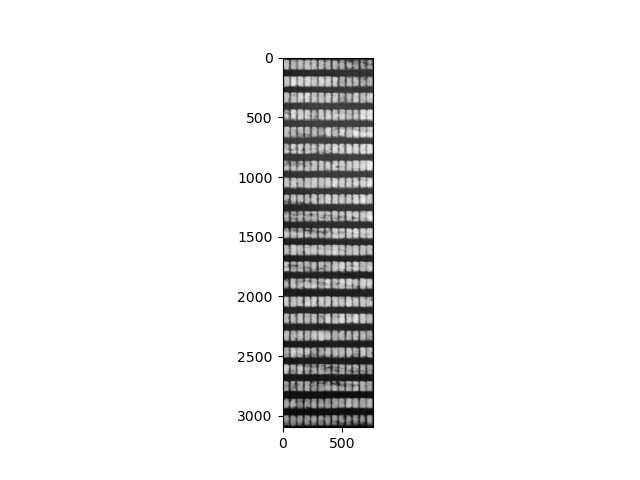

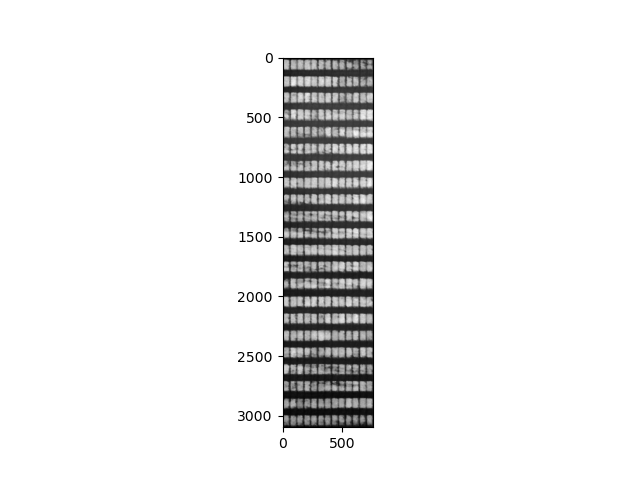

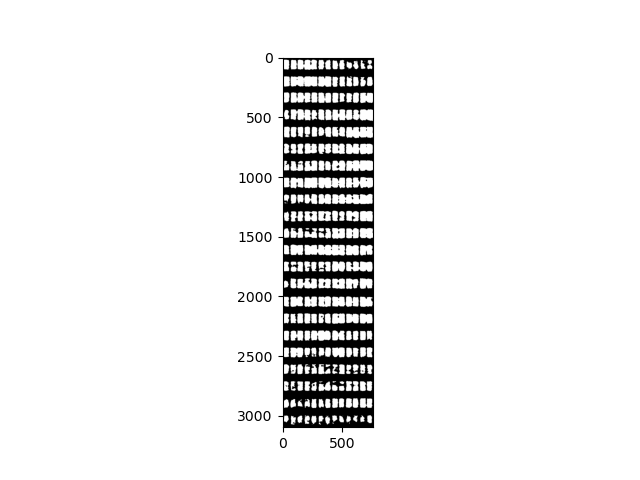

In [2]:
# First, we are going to read in the image we want to use. Make sure this is an RGB image.
geoimg = geo.read_geotif("/Users/Your_Username/Location/RGB_image.tif",
                     bands="r,g,b")

# Next we are going to read in the DSM that will be used in our function.
img, _, _ = pcv.readimage("/Users/Your_Username/Location/DSM_image.tif")

# We will transform the image so our functions can successfully read them in.
img = pcv.transform.rescale(gray_img = img, min_value=0, max_value=255)

# We will make a binary mask for the object.
plant_mask = pcv.threshold.binary(gray_img = img, threshold=125, object_type="light")

In [20]:
# This function opens napari, where you can create layers. Please see the images and instructions below before you run this code.
img=geoimg
viewer = napari.Viewer()
viewer.add_image(img.pseudo_rgb)

viewer.add_points()

<Points layer 'Points' at 0x31e4d8740>

Congratulations, you've opened napari! Rename your points layer to '4cornerpoints' by double-clicking where the layer is labeled 'Points' in the image below. Then, **starting in the top left corner**, make 4 points in each corner of your field going clockwise. Don't worry about perfectly aligning the points of the rectangle, the 4 points just have to contain the whole field. 

<img src="./img/tutorial-imgs/img2.png" align="left" width="650" height="600" />

In [21]:
# This code saves the '4cornerpoints' layer as a geojson.
geo.points_to_geojson(img, viewer, out_path="/Users/Your_Username/Location/4cornerpoints.geojson")

In [23]:
# Now we will do the same thing, except instead of creating 4 corner points, you will now be creating points that indicate where your plots are. Please see the images and instructions below before you run this code.
img=geoimg
viewer = napari.Viewer()
viewer.add_image(img.pseudo_rgb)

viewer.add_points()

<Points layer 'Points' at 0x32c26fa70>

Rename this layer to 'gridpoints'. Make your points at the top left corner of each of your plots. 

<img src="./img/tutorial-imgs/img3.png" align="left" width="650" height="600" />

In [24]:
# This code saves the 'gridpoints' layer as a geojson.
geo.points_to_geojson(img, viewer, out_path="/Users/Your_Username/Location/gridpoints.geojson")

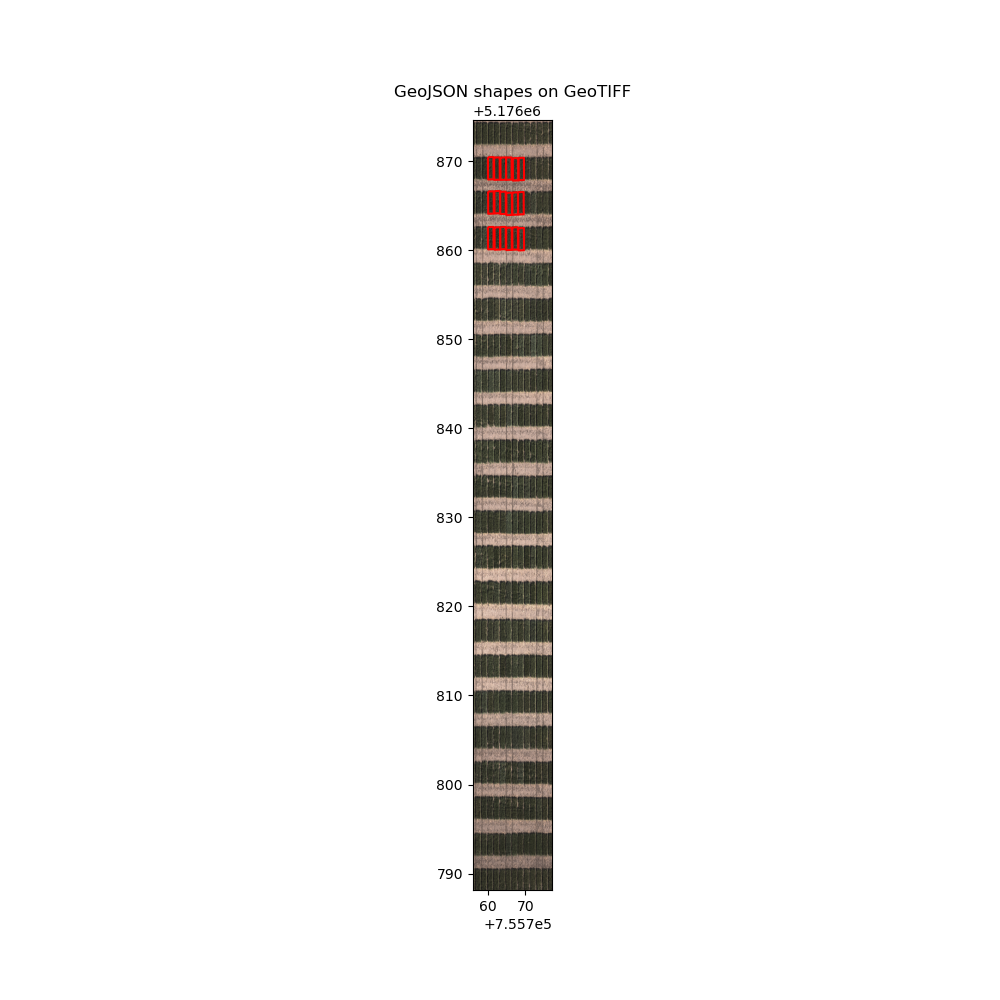

In [27]:
# The gridcells function creates grids from the designated plot points. Adjust the dimensions of the range length and row length as needed.
gridcells = geo.shapes.flexible(img=geoimg, field_corners_path="/Users/Your_Username/Location/4cornerpoints.geojson", 
                                plot_geojson_path="/Users/Your_Username/Location/gridpoints.geojson", 
                                out_path="/Users/Your_Username/Location/gridcells.geojson", num_rows=1,
                                range_length=2.5, row_length=1.5)

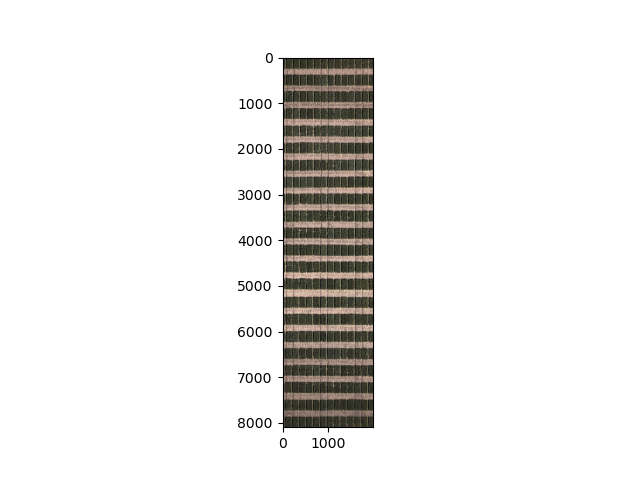

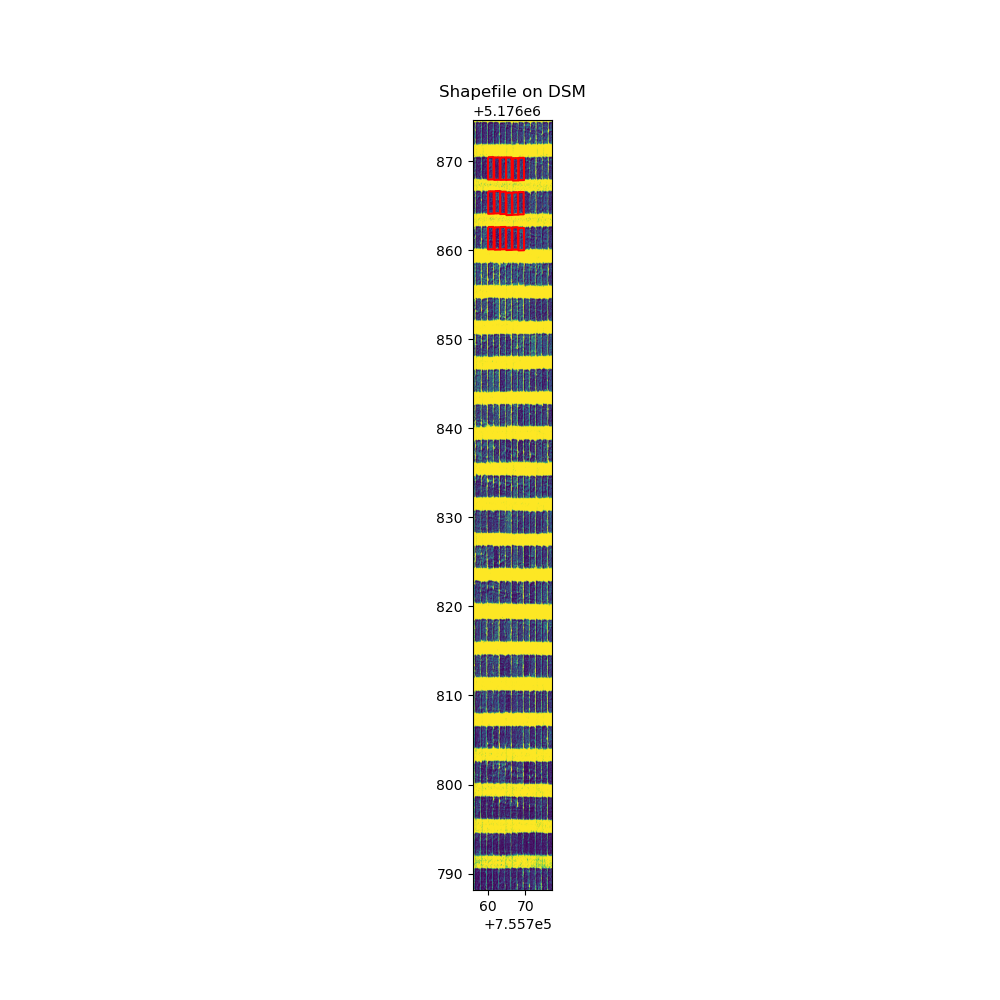

44.38299407958985


In [8]:
import plantcv.geospatial as gcv
import plantcv.plantcv as pcv

# Read geotif in.
dsm = gcv.read_geotif(filename="/Users/Your_Username/Location/RGB_image.tif", bands="R,G,B")

# Analyze height for each region in the geojson.
bounds = gcv.analyze.height_percentile(dsm=dsm, geojson="/Users/Your_Username/Location/gridcells.geojson", percentile = [25,90],label="default")

# To access individual observation values:
print(pcv.outputs.observations["default_0"]["plant_height"]["value"])

#To save the outputs as a shapefile: 
pcv.outputs.save_results(filename="/Users/Your_Username/Location/finalplots.geojson")
    
